<a href="https://colab.research.google.com/github/mekilic7/Colab/blob/main/investing_us_cotton_no_2_v_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install gdown
!pip install tensorflow-gpu

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 30, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
df_ = pd.read_csv('/content/investing_us_cotton_no_2-01-01-00_15-11-21.csv')

In [3]:
df_.info()
df_['Şimdi'] = df_['Şimdi'].str.replace(',','.')
df_['Şimdi'] = df_['Şimdi'].astype(float, errors = 'raise')
df_.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   3111 non-null   object
 1   Şimdi   3111 non-null   object
 2   Açılış  3111 non-null   object
 3   Yüksek  3111 non-null   object
 4   Düşük   3111 non-null   object
 5   Hac.    3111 non-null   object
 6   Fark %  3111 non-null   object
dtypes: object(7)
memory usage: 170.3+ KB


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,15.11.2021,117.67,"117,73","118,18","116,51",-,"0,06%"
1,12.11.2021,117.60,"118,62","118,91","116,67",-,"-0,84%"
2,11.11.2021,118.60,"118,89","119,19","117,58",-,"-0,13%"
3,10.11.2021,118.76,"118,95","120,73","118,61",-,"-0,21%"
4,09.11.2021,119.01,"116,80","120,43","116,27",-,"1,98%"


In [4]:
df = df_[["Tarih","Şimdi"]]
df.head()
df.columns = ["Date","Price"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3111 non-null   object 
 1   Price   3111 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.7+ KB


In [5]:
df.head()

,Date,Price
0,15.11.2021,117.67
1,12.11.2021,117.60
2,11.11.2021,118.60
3,10.11.2021,118.76
4,09.11.2021,119.01


In [6]:
df.tail()

,Date,Price
3106,19.10.2009,66.43
3107,18.10.2009,68.28
3108,16.10.2009,68.26
3109,15.10.2009,67.15
3110,14.10.2009,67.14


In [7]:
data = df.Price.values
#data_rev = df.Price.values.iloc[::-1]


In [8]:
data_reversed = data[::-1]

In [9]:
data_reversed

array([ 67.14,  67.15,  68.26, ..., 118.6 , 117.6 , 117.67])

In [10]:

data = data.reshape(-1, 1)
data_reversed = data_reversed.reshape(-1, 1)

In [11]:

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data[:10]

array([[0.41711619],
       [0.41669192],
       [0.42275289],
       [0.42372265],
       [0.42523789],
       [0.41123704],
       [0.41335839],
       [0.41044912],
       [0.42335899],
       [0.4159646 ]])

In [12]:
scaler_r = MinMaxScaler(feature_range=(0,1))
data_reversed = scaler_r.fit_transform(data_reversed)
data_reversed[:10]

array([[0.1108552 ],
       [0.11091581],
       [0.11764349],
       [0.11776471],
       [0.10655191],
       [0.11303715],
       [0.11685557],
       [0.11879508],
       [0.11406752],
       [0.1139463 ]])

In [13]:
timestep = 5
X = []
Y = []
for i in range(len(data)-(timestep)):
    X.append(data[i:i+timestep])
    Y.append(data[i+timestep])

In [14]:
timestep = 5
X_reversed = []
Y_reversed = []
for i in range(len(data_reversed)-(timestep)):
    X_reversed.append(data_reversed[i:i+timestep])
    Y_reversed.append(data_reversed[i+timestep])

In [15]:
X = np.asanyarray(X)
X = X.reshape((X.shape[0],X.shape[1],1))

Y = np.asanyarray(Y)

In [16]:
X_reversed = np.asanyarray(X_reversed)
X_reversed = X_reversed.reshape((X_reversed.shape[0],X_reversed.shape[1],1))

Y_reversed = np.asanyarray(Y_reversed)

In [17]:
_division_ratio = 0.7

k = int(_division_ratio*len(Y))
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]

Ytrain = Y[:k]
Ytest = Y[k:]

In [18]:
_division_ratio = 0.7
k = int(_division_ratio*len(Y_reversed))

Xtrain_reversed = X_reversed[:k,:,:]
Xtest_reversed = X_reversed[k:,:,:]

Ytrain_reversed = Y_reversed[:k]
Ytest_reversed = Y_reversed[k:]

In [19]:
_dropout = 0.1

model = Sequential()
model.add(LSTM(128,
               batch_input_shape=(None,timestep,1),     
               return_sequences=True))
model.add(Dropout(_dropout))

model.add(LSTM(64,return_sequences=True))
model.add(Dropout(_dropout))

model.add(LSTM(32,return_sequences=False))
model.add(Dropout(_dropout))


model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

[]

In [ ]:
_epochs = 5000

history = model.fit(Xtrain,
          Ytrain,
          batch_size=20,
          validation_data=(Xtest,Ytest),
          verbose=1,
          epochs=_epochs,
          shuffle=False)







#Tarih sıralanmamış sonuçlar.#

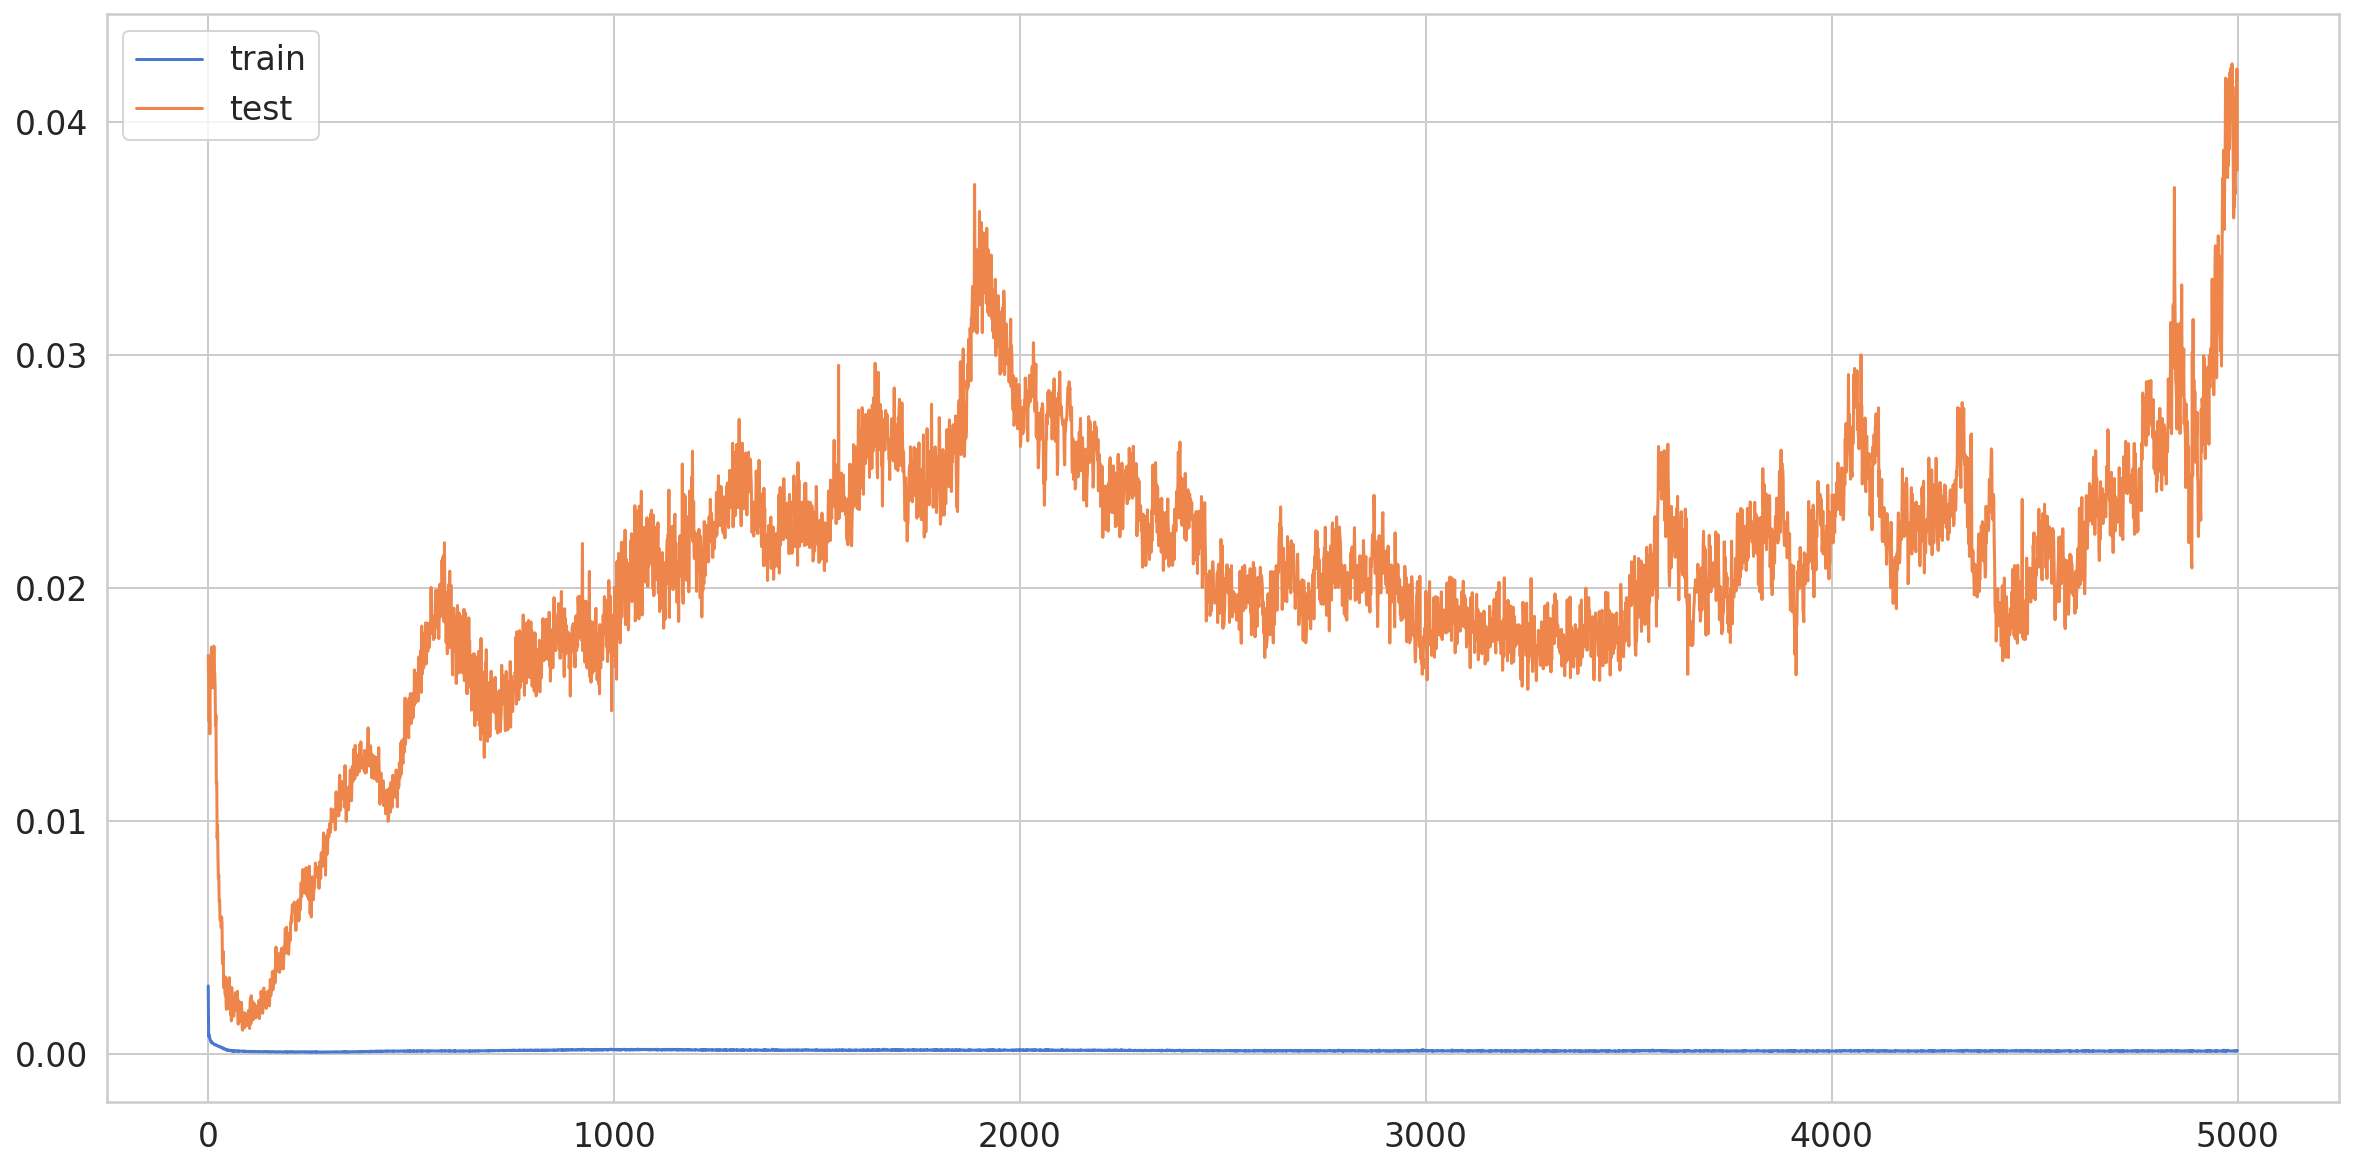

In [22]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [25]:

def predict(Xtest,Ytest,days):
    beg = random.randint(0,len(Ytest)-days)
    selected_input = Xtest[beg:beg+days,:,:]
    real_output = scaler.inverse_transform(Ytest[beg:beg+days])
    predicted_output = model.predict(selected_input, batch_size=1)
    predicted_output = scaler.inverse_transform(predicted_output)
    # Sonuçlar Grafik halinde gösterilir.
    #results(real_output,predicted_output)
    
    print(f'{days} day forecast results')
    plt.figure(figsize=(20,8))
    xpos = range(len(predicted_output))
    plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
    plt.legend(('Real','Predicted'))
    plt.savefig('out.jpg',dpi=400)
    plt.grid()
    plt.show()
    

900 day forecast results


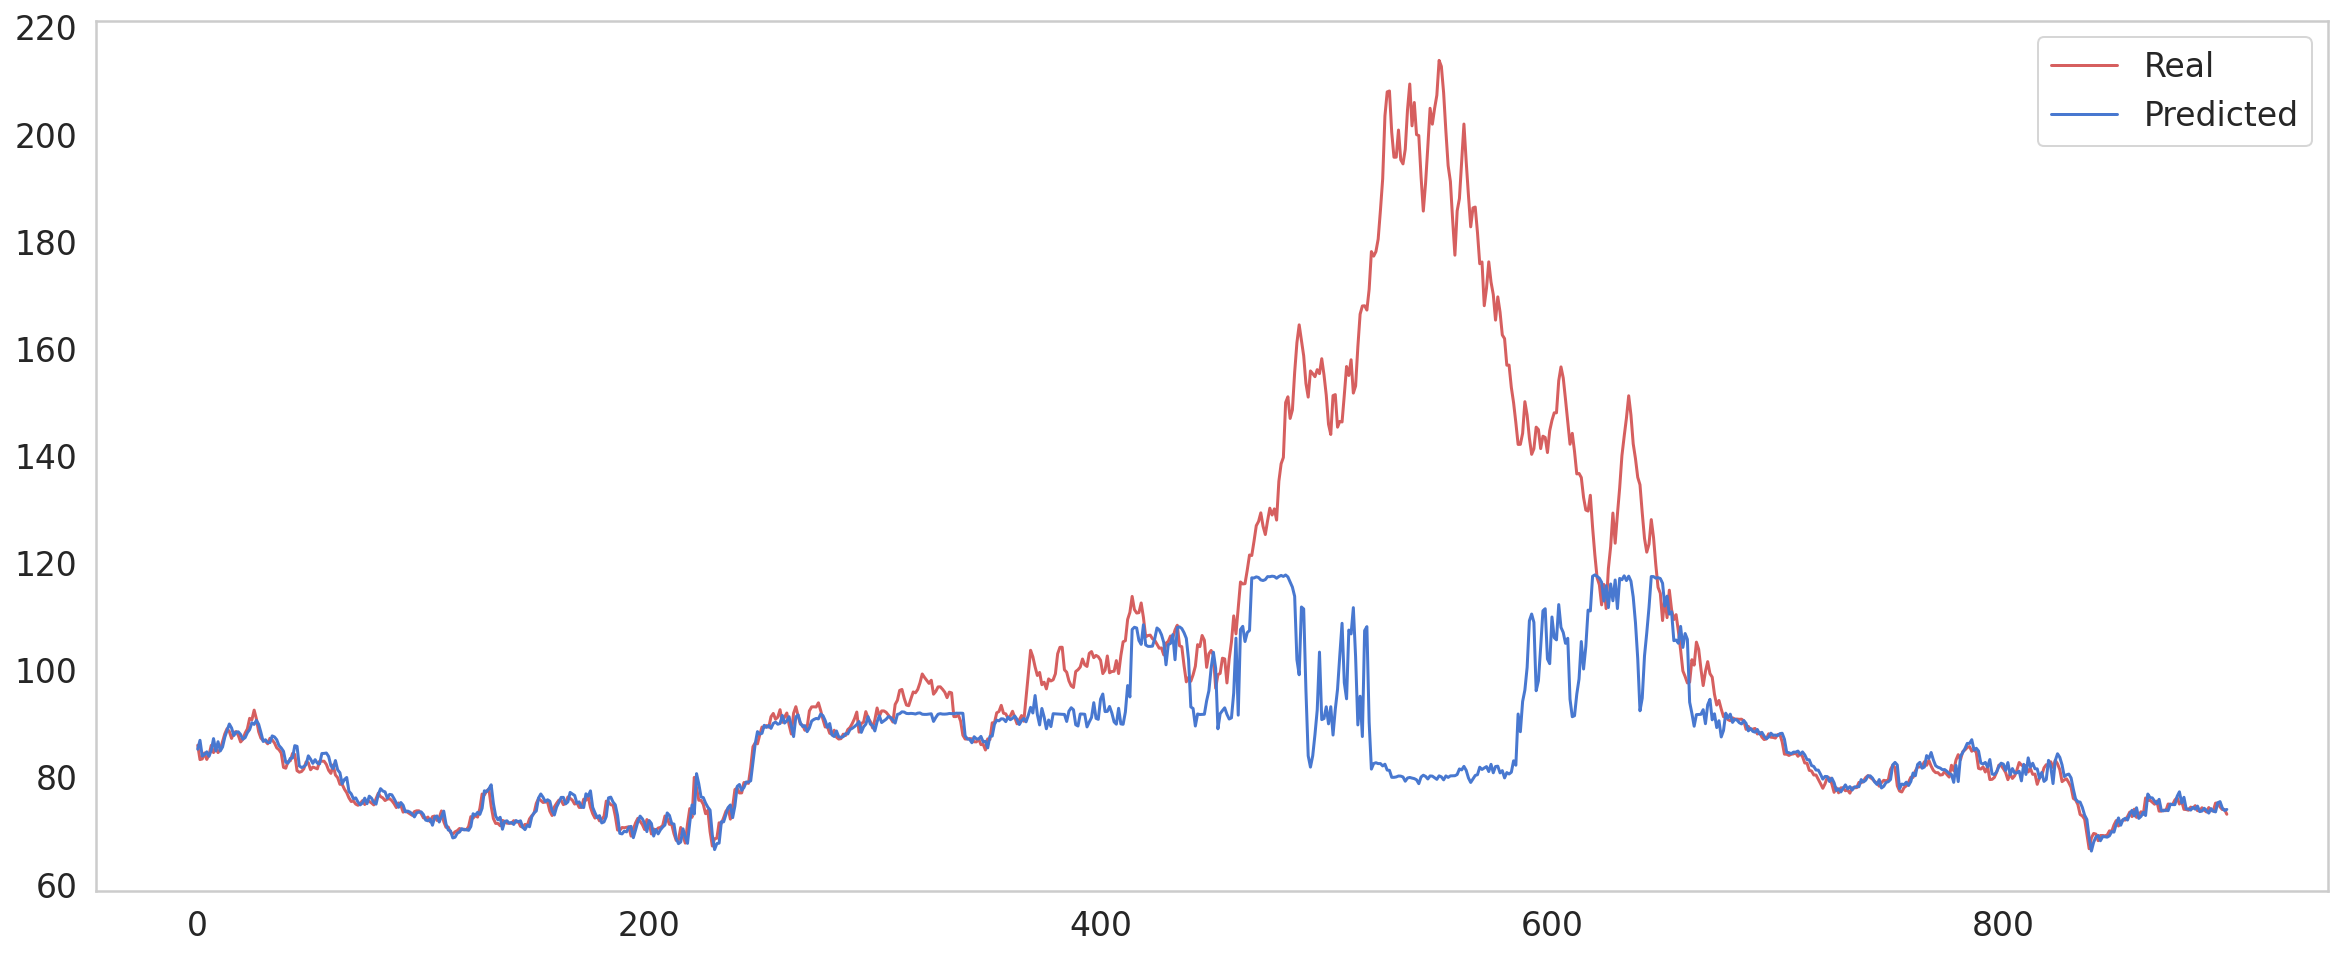

In [27]:
predict(Xtest,Ytest,900)

In [ ]:
_reversed

#Tarihe göre sıralanmış time step 5 eopoch 5000 model

In [ ]:
_epochs = 5000

history_reversed = model.fit(Xtrain_reversed,
                            Ytrain_reversed,
                            batch_size=20,
                            validation_data=(Xtest_reversed,Ytest_reversed),
                            verbose=1,
                            epochs=_epochs,
                            shuffle=False)

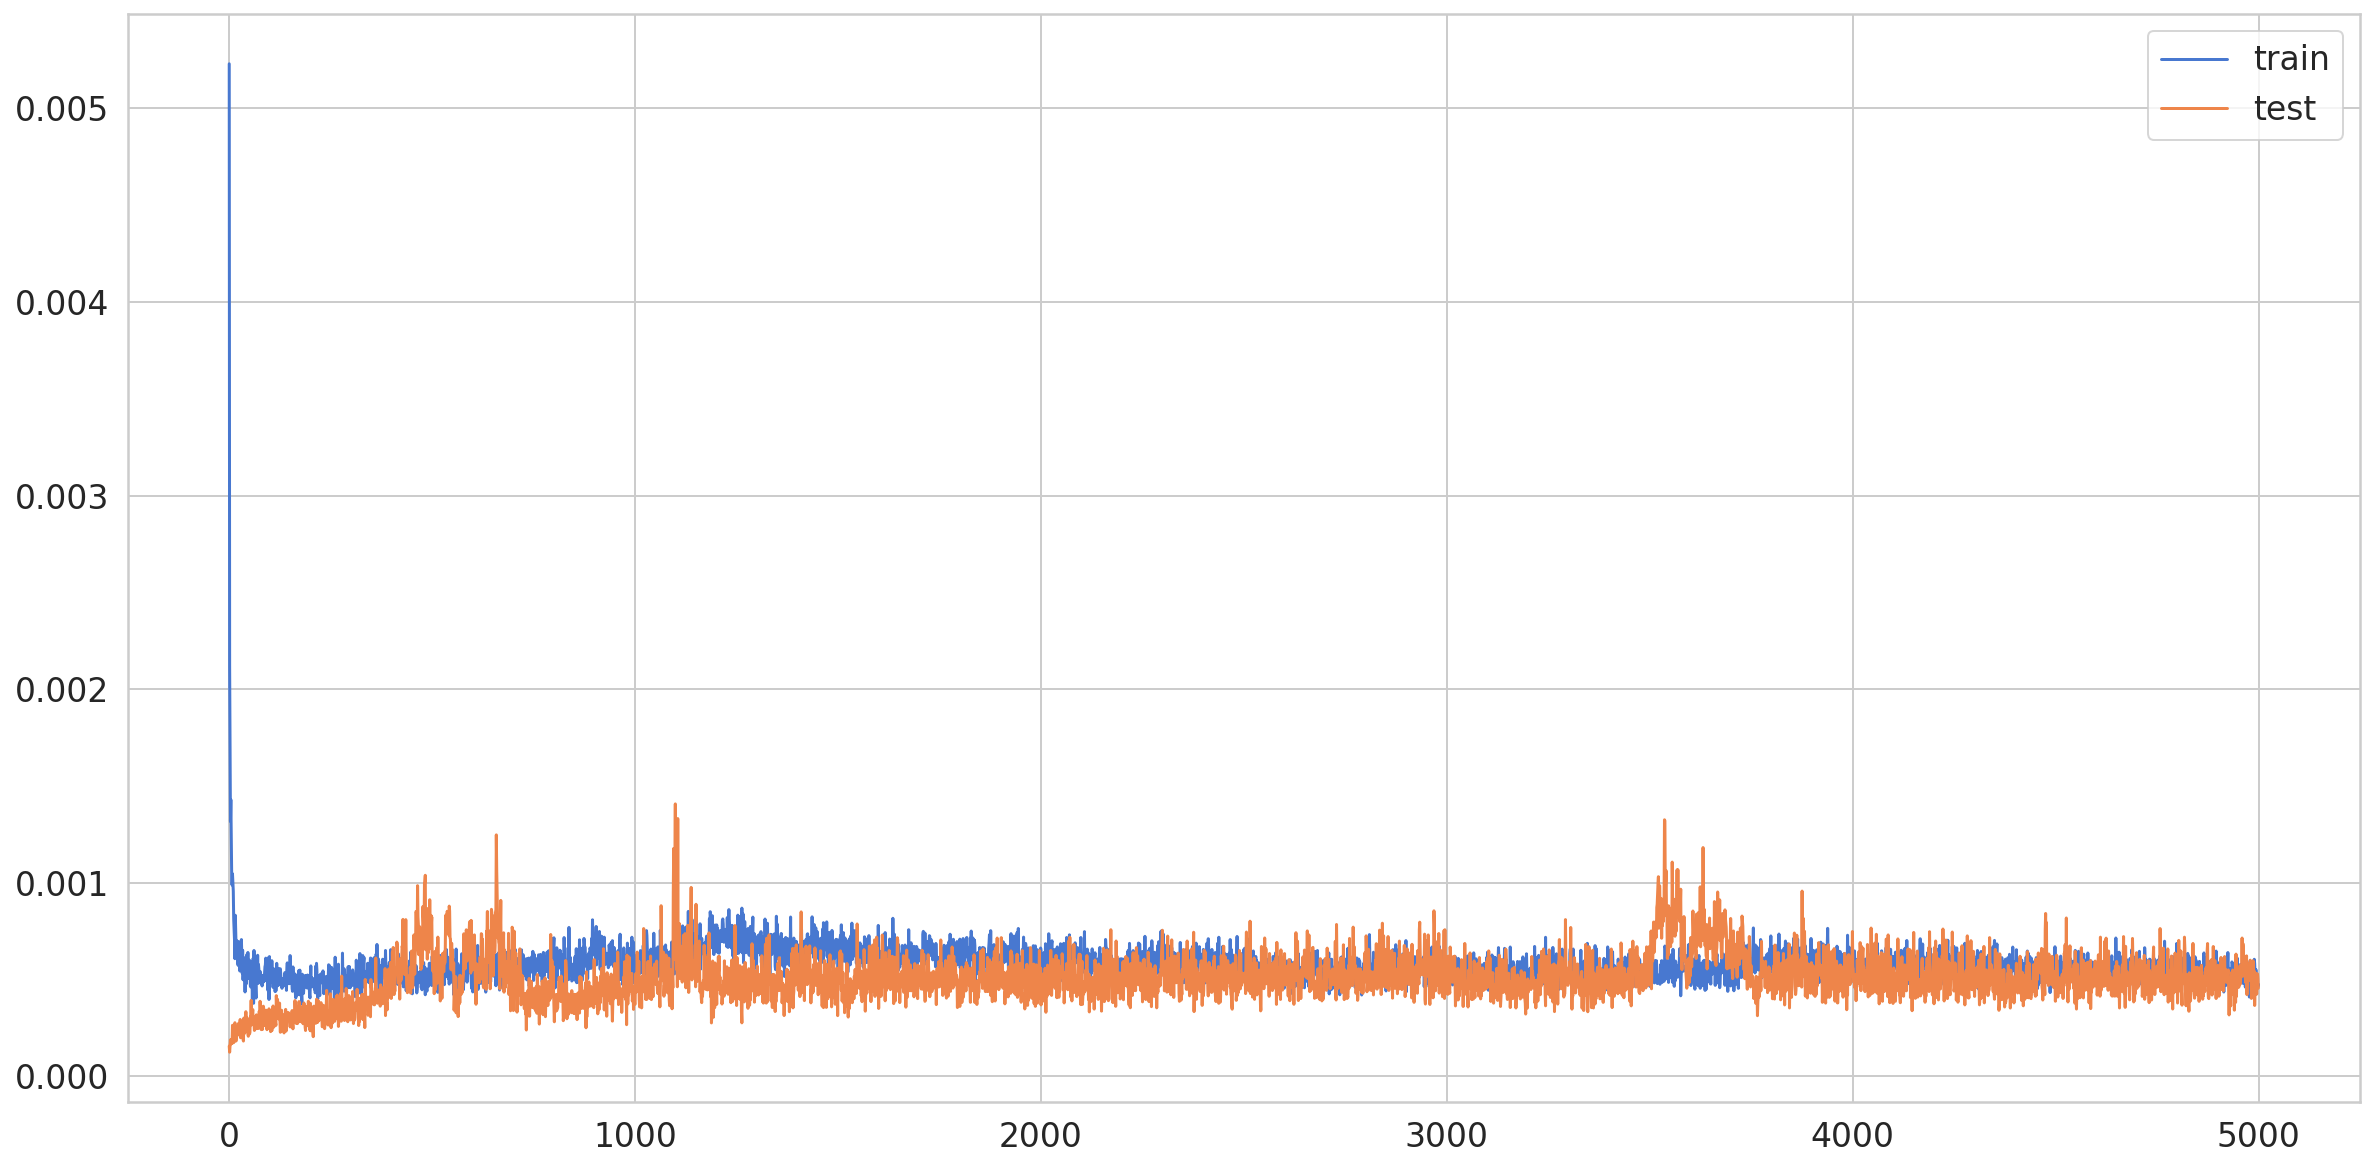

In [29]:
plt.figure(figsize=(20,10))
plt.plot(history_reversed.history['loss'], label='train')
plt.plot(history_reversed.history['val_loss'], label='test')
plt.legend();

900 day forecast results


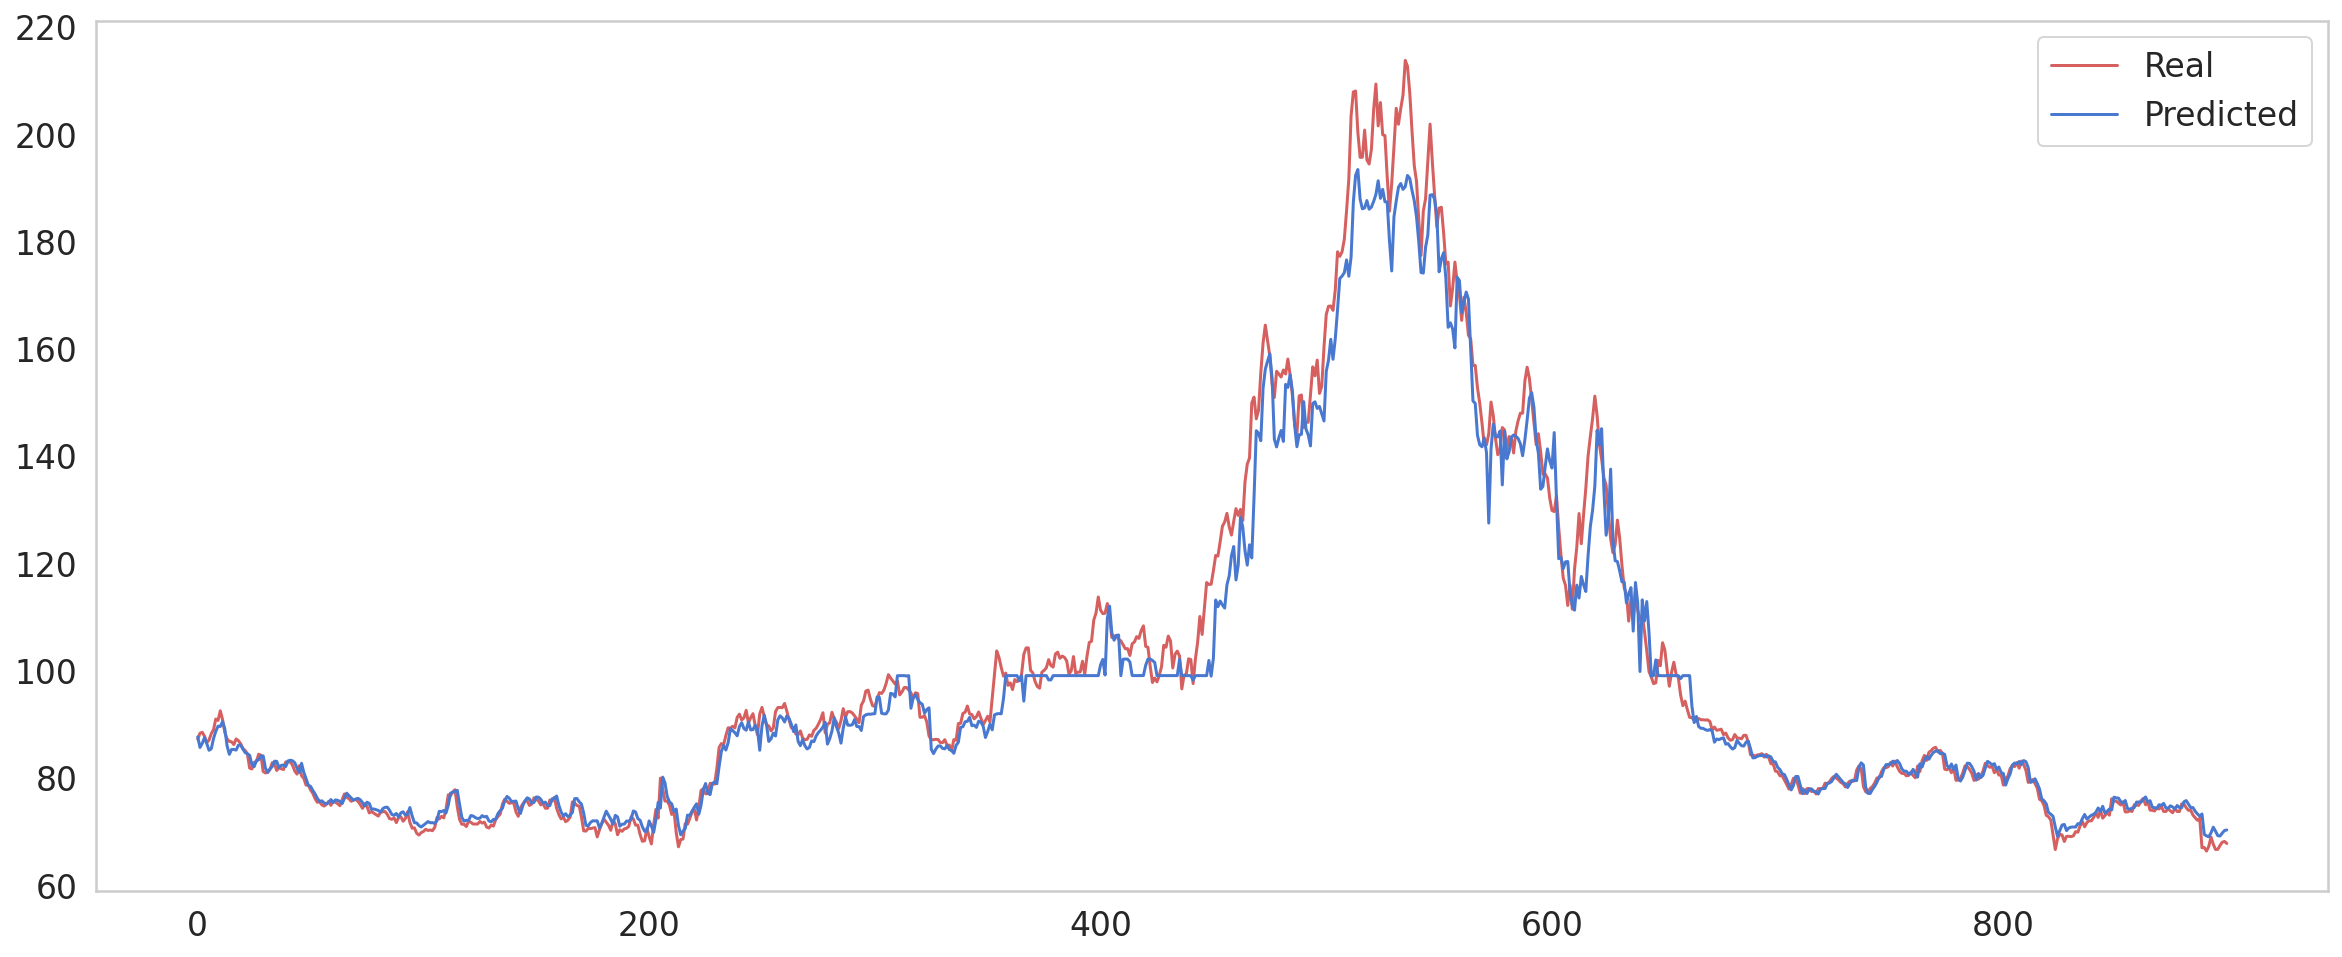

In [30]:
predict(Xtest,Ytest,900)

In [31]:
def results(real_output,predicted_output):     
    df_result = pd.DataFrame()
    df_r1 = pd.DataFrame(real_output, columns = ['real'])
    df_r2 = pd.DataFrame(predicted_output, columns = ['predicted'])
    df_result['Gerçek'] = df_r1['real']
    df_result['Tahmin'] = df_r2['predicted']
    df_result['Fark'] = df_result['Tahmin'] - df_result['Gerçek'] 
    df_result['MutlakFark'] = df_result['Fark'].abs()
    df_result['HataOranı'] = (df_result['Fark'].abs() / df_result['Gerçek']) * 100
    print(df_result)
    
    print('################ORTALAMA DEĞERLER################## \n')
    print('Gerçek Ortalama: ' , df_result['Gerçek'].mean(),'\n')
    
    print('Tahmini Ortalama: ', df_result['Tahmin'].mean(),'\n')
    
    print('Fark Ortalama: ', df_result['Fark'].mean(),'\n')
    
    print('Hata Oranı Ortalama(%): ', df_result['HataOranı'].mean(),'\n')
    
    
    


def predict(Xtest,Ytest,days):
    beg = random.randint(0,len(Ytest)-days)
    selected_input = Xtest[beg:beg+days,:,:]
    real_output = scaler.inverse_transform(Ytest[beg:beg+days])
    predicted_output = model.predict(selected_input, batch_size=1)
    predicted_output = scaler.inverse_transform(predicted_output)
    # Sonuçlar Grafik halinde gösterilir.
    results(real_output,predicted_output)
    
    print(f'{days} day forecast results')
    plt.figure(figsize=(20,8))
    xpos = range(len(predicted_output))
    plt.plot(xpos,real_output,'r',xpos,predicted_output,'b')
    plt.legend(('Real','Predicted'))
    plt.savefig('out.jpg',dpi=400)
    plt.grid()
    plt.show()
    

     Gerçek     Tahmin      Fark  MutlakFark  HataOranı
0     88.39  85.737267 -2.652733    2.652733   3.001169
1     88.56  86.498581 -2.061419    2.061419   2.327709
2     87.84  87.546608 -0.293392    0.293392   0.334007
3     86.63  86.471809 -0.158191    0.158191   0.182605
4     87.11  85.216370 -1.893630    1.893630   2.173838
..      ...        ...       ...         ...        ...
895   67.48  69.228561  1.748561    1.748561   2.591229
896   68.08  69.791817  1.711817    1.711817   2.514419
897   68.21  70.259918  2.049918    2.049918   3.005305
898   67.83  70.350098  2.520098    2.520098   3.715314
899   67.20  70.042130  2.842130    2.842130   4.229359

[900 rows x 5 columns]
################ORTALAMA DEĞERLER################## 

Gerçek Ortalama:  99.12076666666664 

Tahmini Ortalama:  97.4419174194336 

Fark Ortalama:  -1.678901322089303 

Hata Oranı Ortalama(%):  2.6196868809856317 

900 day forecast results


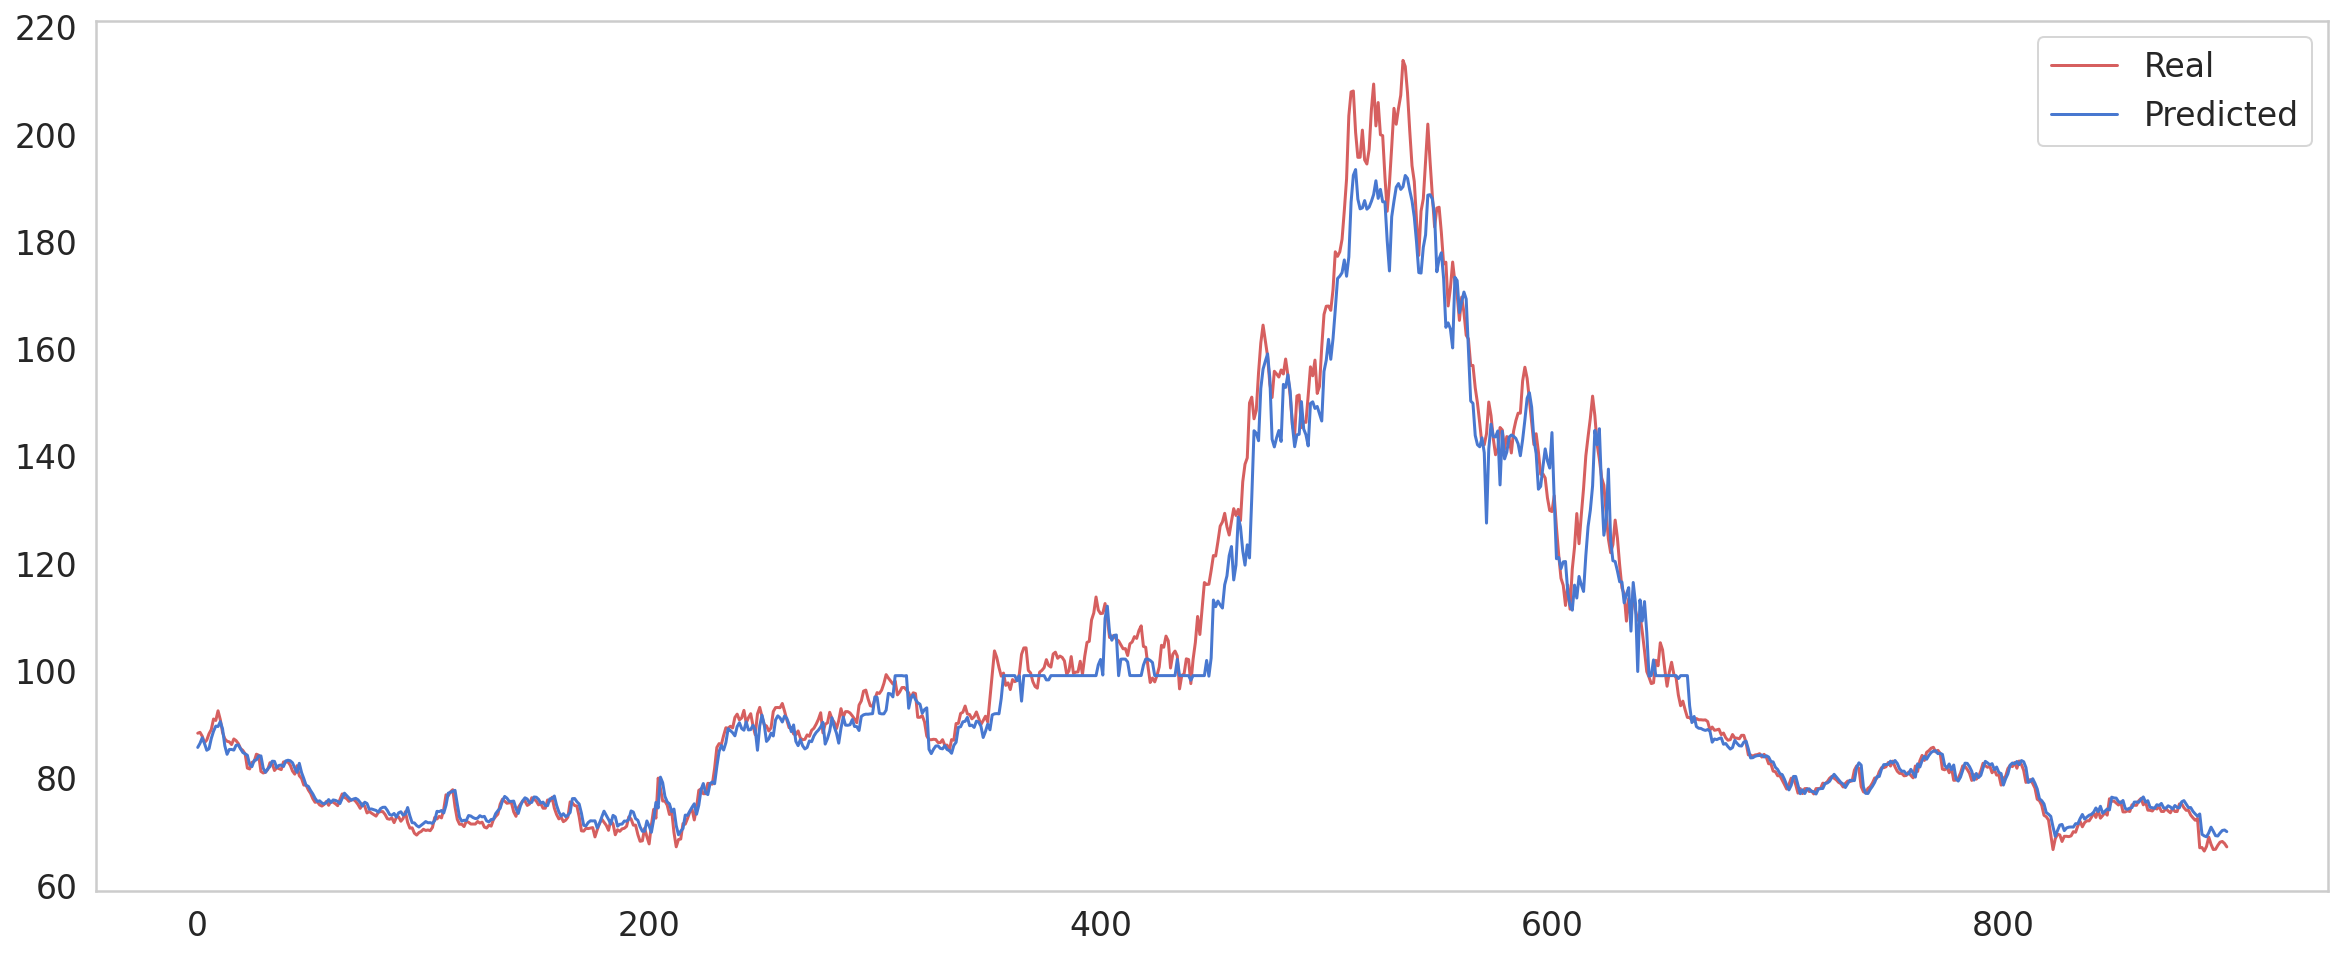

In [32]:
predict(Xtest,Ytest,900)


    Gerçek      Tahmin      Fark  MutlakFark  HataOranı
0   119.73  116.622223 -3.107777    3.107777   2.595654
1   115.49  116.584885  1.094885    1.094885   0.948034
2   114.37  112.698502 -1.671498    1.671498   1.461483
3   109.29  114.305023  5.015023    5.015023   4.588730
4   113.50  115.536026  2.036026    2.036026   1.793856
..     ...         ...       ...         ...        ...
95   80.00   80.729813  0.729813    0.729813   0.912266
96   79.69   80.234695  0.544695    0.544695   0.683518
97   79.23   79.745270  0.515270    0.515270   0.650347
98   78.98   79.215034  0.235034    0.235034   0.297587
99   78.37   78.920624  0.550624    0.550624   0.702595

[100 rows x 5 columns]
################ORTALAMA DEĞERLER################## 

Gerçek Ortalama:  89.756 

Tahmini Ortalama:  89.84867858886719 

Fark Ortalama:  0.09268721008300758 

Hata Oranı Ortalama(%):  1.792960491086644 

100 day forecast results


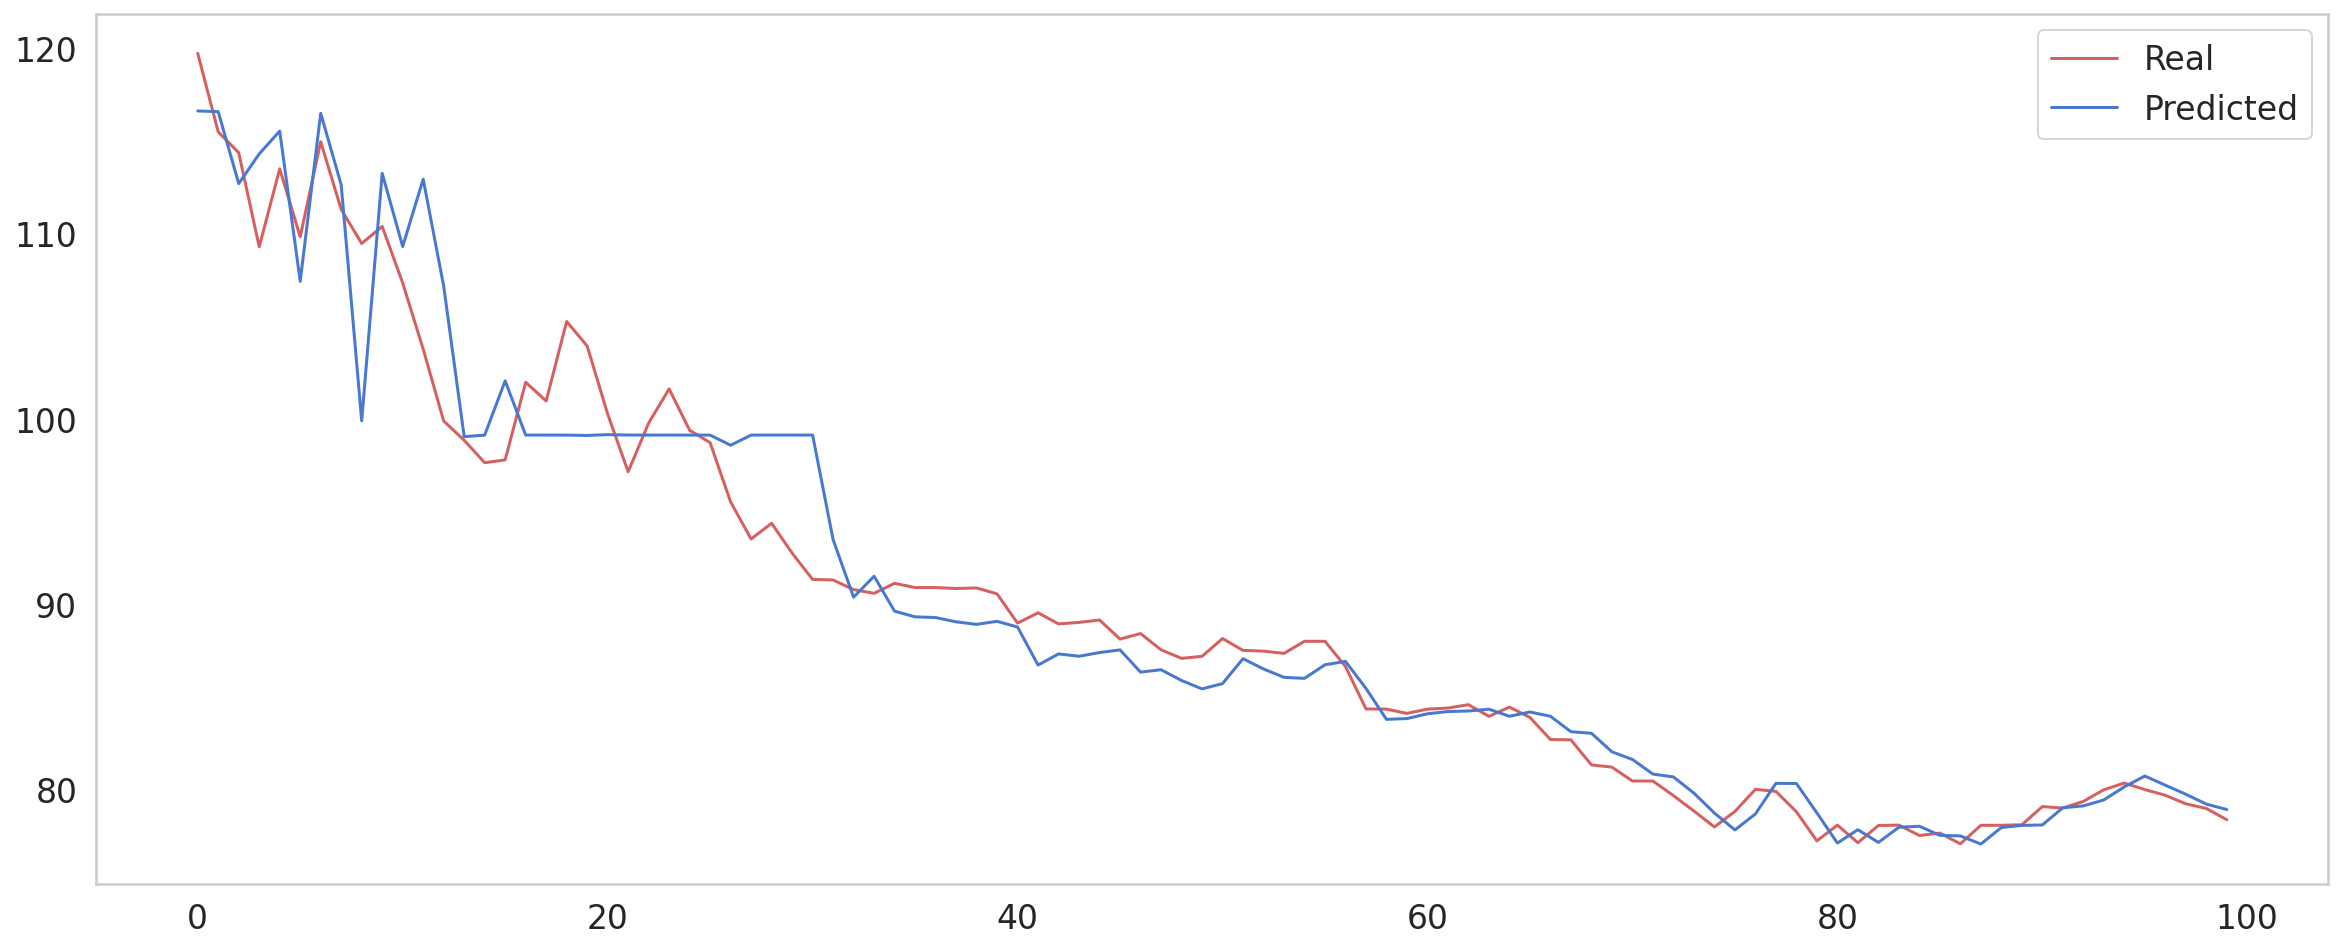

In [35]:
predict(Xtest,Ytest,100)

   Gerçek     Tahmin      Fark  MutlakFark  HataOranı
0   85.74  82.184204 -3.555796    3.555796   4.147184
1   86.46  85.003174 -1.456826    1.456826   1.684971
2   86.28  86.105431 -0.174569    0.174569   0.202329
3   87.96  85.263779 -2.696221    2.696221   3.065281
4   89.41  86.630280 -2.779720    2.779720   3.108959
5   89.32  89.228828 -0.091172    0.091172   0.102073
6   89.69  88.886314 -0.803686    0.803686   0.896070
7   89.38  88.488068 -0.891932    0.891932   0.997910
8   91.34  87.903244 -3.436756    3.436756   3.762597
9   91.95  89.636787 -2.313213    2.313213   2.515729
################ORTALAMA DEĞERLER################## 

Gerçek Ortalama:  88.75300000000001 

Tahmini Ortalama:  86.9330062866211 

Fark Ortalama:  -1.8199891357421862 

Hata Oranı Ortalama(%):  2.0483104531280305 

10 day forecast results


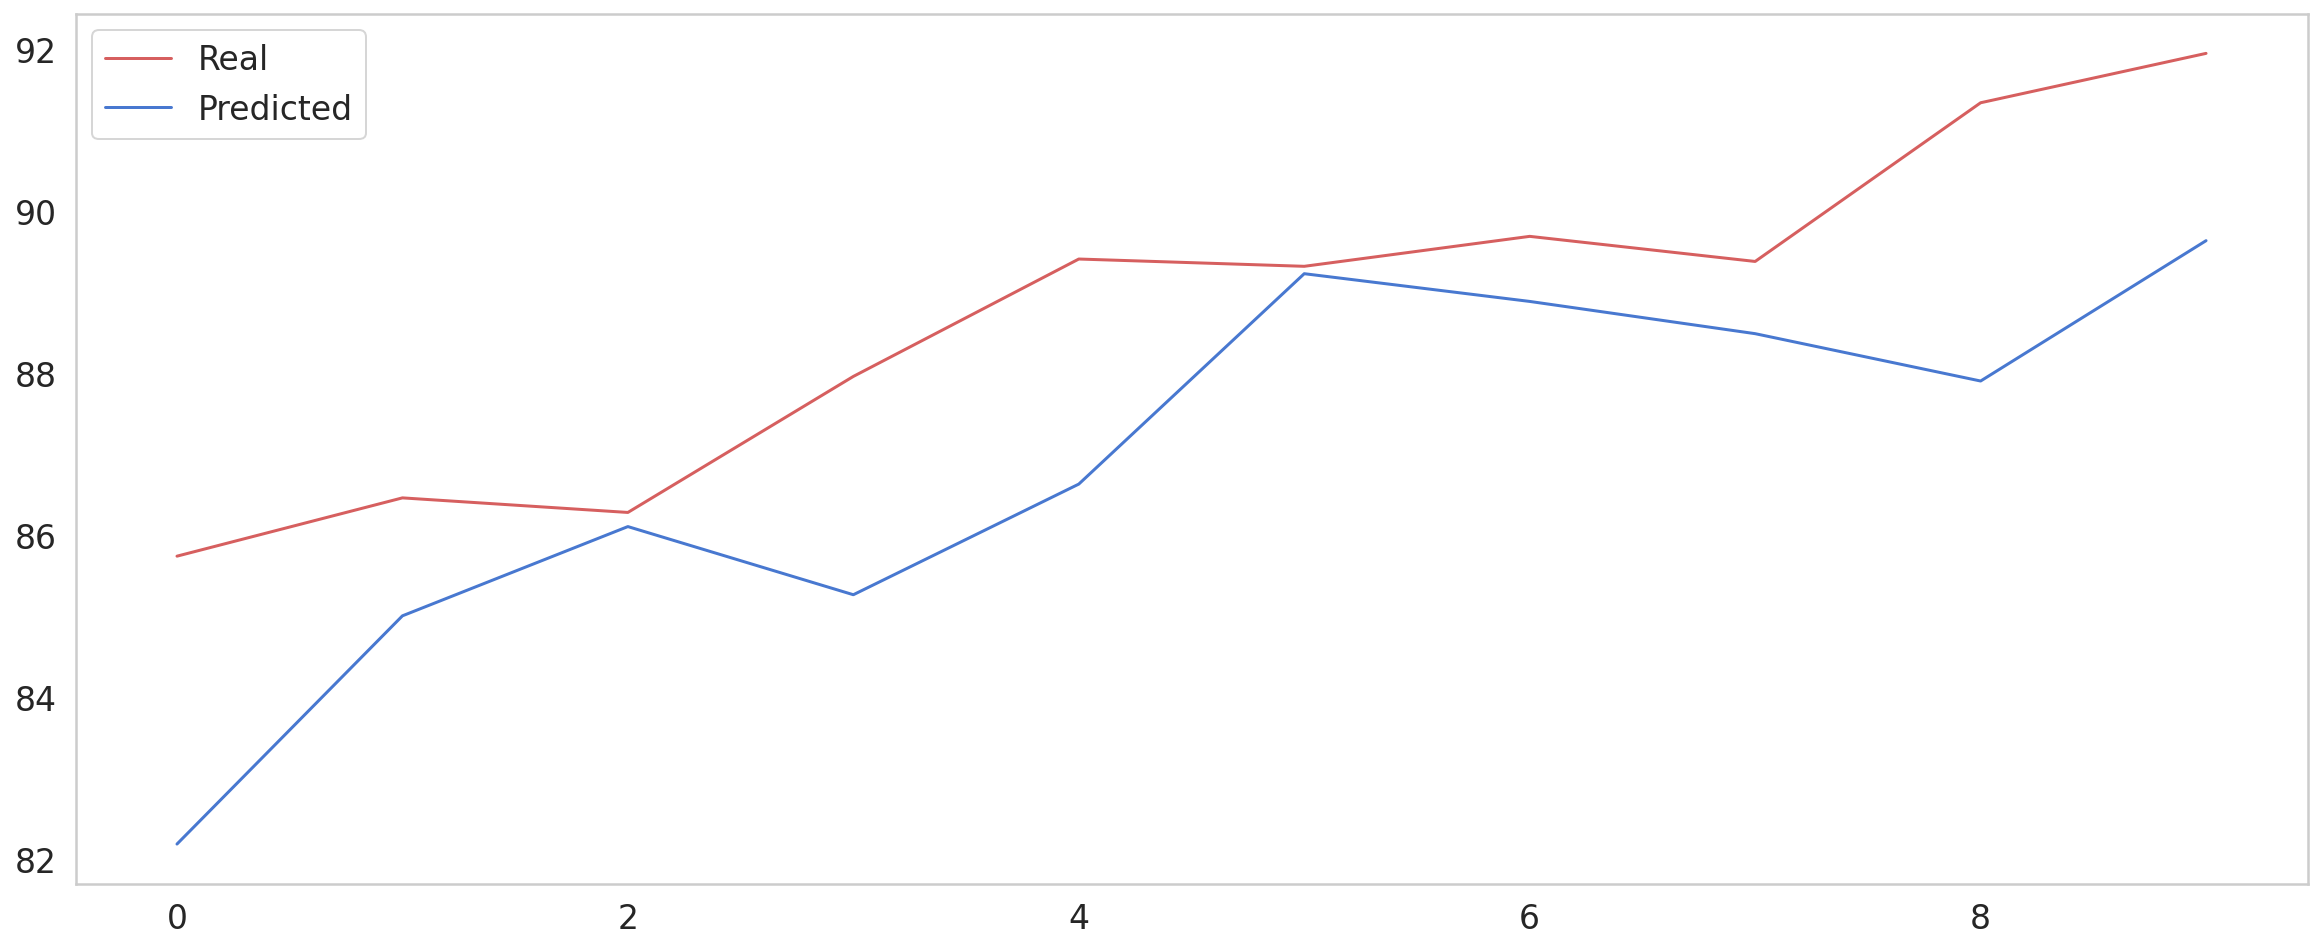

In [34]:
predict(Xtest,Ytest,10)

   Gerçek      Tahmin       Fark  MutlakFark  HataOranı
0  201.62  191.394897 -10.225103   10.225103   5.071472
1   74.92   75.016228   0.096228    0.096228   0.128441
2   91.12   87.232315  -3.887685    3.887685   4.266555
3   68.09   70.394356   2.304356    2.304356   3.384279
4  110.16   99.135391 -11.024609   11.024609  10.007815
5   67.83   69.535698   1.705698    1.705698   2.514666
6  116.17   99.031952 -17.138048   17.138048  14.752559
7   69.62   70.653336   1.033336    1.033336   1.484251
8   71.09   71.433449   0.343449    0.343449   0.483118
9   68.72   70.110535   1.390535    1.390535   2.023479
################ORTALAMA DEĞERLER################## 

Gerçek Ortalama:  93.934 

Tahmini Ortalama:  90.39381408691406 

Fark Ortalama:  -3.540184387207033 

Hata Oranı Ortalama(%):  4.4116635504665975 

10 day forecast results


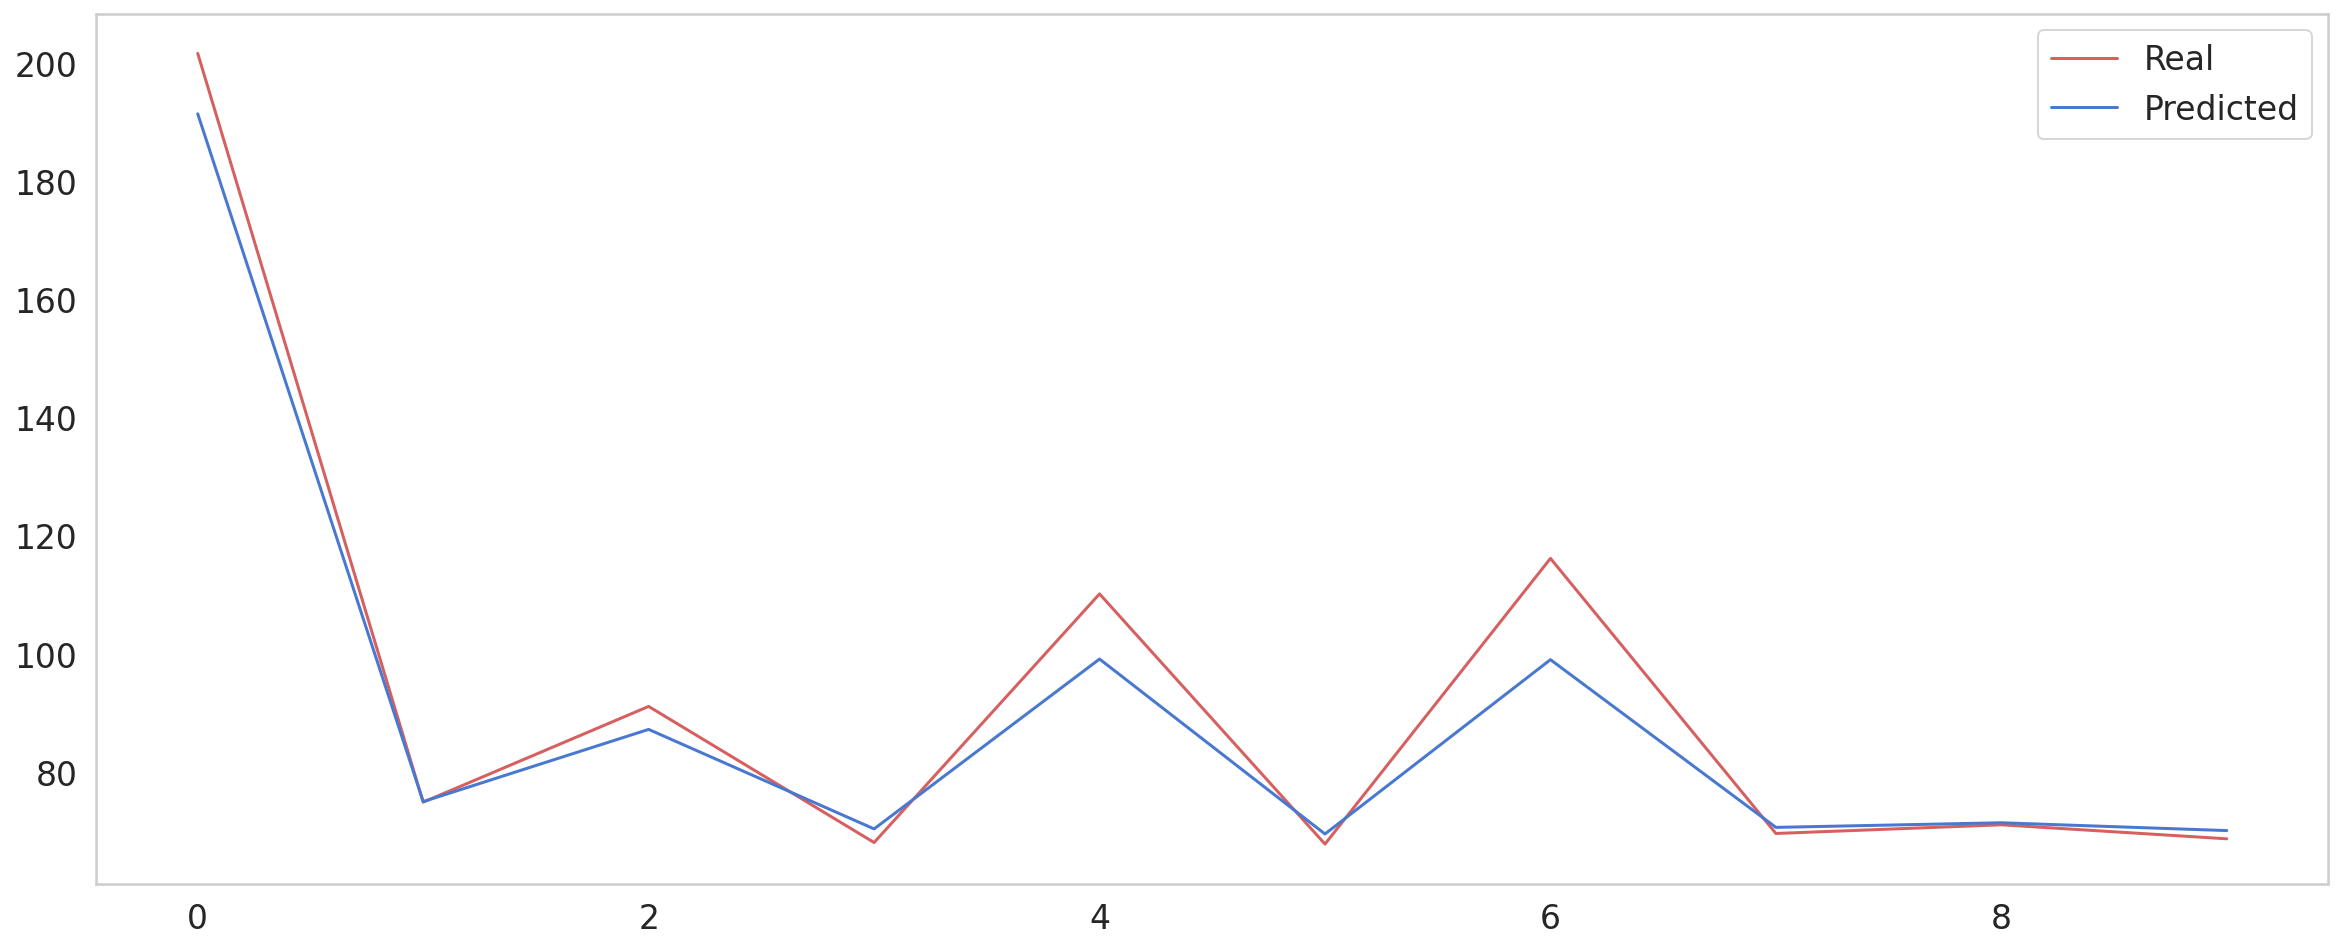

In [50]:



from sklearn.model_selection import train_test_split
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, Y, test_size=0.30, random_state=42)

predict(X_test_rand,y_test_rand,10)

In [40]:
data_reversed[:3]

array([[0.1108552 ],
       [0.11091581],
       [0.11764349]])

#Tarihe göre sıralanmış time step 3 epoch 1000 model

In [45]:
timestep = 3
X_60 = []
Y_60 = []
for i in range(len(data_reversed)-(timestep)):
    X_60.append(data_reversed[i:i+timestep])
    Y_60.append(data_reversed[i+timestep])

X_60 = np.asanyarray(X_60)
X_60 = X_60.reshape((X_60.shape[0],X_60.shape[1],1))

Y_60 = np.asanyarray(Y_60)


_division_ratio = 0.7

k = int(_division_ratio*len(Y_60))
Xtrain_60 = X_60[:k,:,:]
Xtest_60 = X_60[k:,:,:]

Ytrain_60 = Y_60[:k]
Ytest_60 = Y_60[k:]

In [46]:
_dropout_60 = 0.05

model_60 = Sequential()
model_60.add(LSTM(128,
               batch_input_shape=(None,timestep,1),     
               return_sequences=True))
model_60.add(Dropout(_dropout_60))

model_60.add(LSTM(64,return_sequences=True))
model_60.add(Dropout(_dropout_60))

model_60.add(LSTM(32,return_sequences=False))
model_60.add(Dropout(_dropout_60))


model_60.add(Dense(1))
model_60.compile(loss='mse', optimizer='adam')


model_60.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 3, 128)            66560     
                                                                 
 dropout_6 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 3, 64)             49408     
                                                                 
 dropout_7 (Dropout)         (None, 3, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
_epochs = 1000

history_60 = model_60.fit(Xtrain_60,
          Ytrain_60,
          batch_size=20,
          validation_data=(Xtest_60,Ytest_60),
          verbose=1,
          epochs=_epochs,
          shuffle=False)

In [1]:
plt.figure(figsize=(20,10))
plt.plot(history_60.history['loss'], label='train')
plt.plot(history_60.history['val_loss'], label='test')
plt.legend();

NameError: ignored